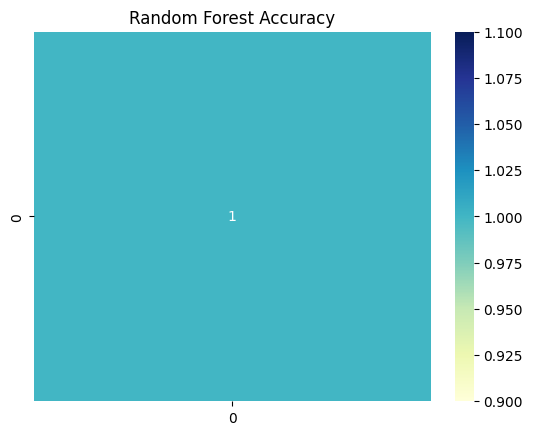

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 資料載入
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 模型訓練
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 預測與評估
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

sns.heatmap([[acc]], annot=True, cmap="YlGnBu")
plt.title("Random Forest Accuracy")
plt.show()

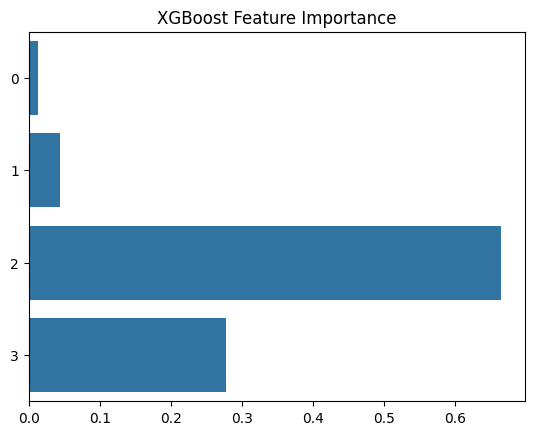

In [2]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

sns.barplot(x=xgb.feature_importances_, y=range(X.shape[1]), orient='h')
plt.title("XGBoost Feature Importance")
plt.show()

In [3]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

estimators = [
    ('svc', SVC(probability=True)),
    ('dt', DecisionTreeClassifier())
]

stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

stack_clf.fit(X_train, y_train)
print("Stacking Accuracy:", stack_clf.score(X_test, y_test))

Stacking Accuracy: 1.0


In [4]:
from sklearn.linear_model import LogisticRegression
import numpy as np

pred1 = rf.predict_proba(X_test)[:,1]
pred2 = xgb.predict_proba(X_test)[:,1]

blend_X = np.vstack([pred1, pred2]).T
blend_model = LogisticRegression().fit(blend_X, y_test)
print("Blending 模型測試準確率:", blend_model.score(blend_X, y_test))

Blending 模型測試準確率: 0.7111111111111111


/tmp/ipython-input-3909475657.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFI

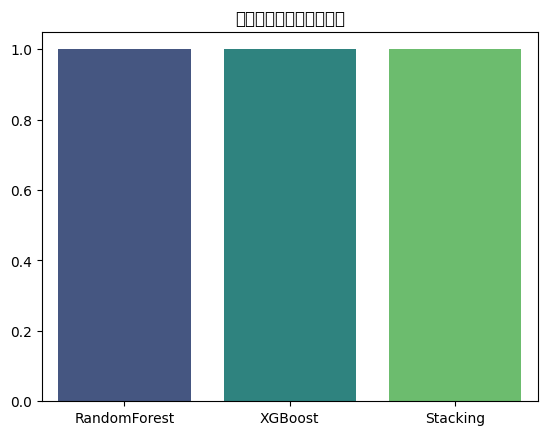

In [5]:
models = ['RandomForest', 'XGBoost', 'Stacking']
scores = [rf.score(X_test, y_test),
          xgb.score(X_test, y_test),
          stack_clf.score(X_test, y_test)]

sns.barplot(x=models, y=scores, palette="viridis")
plt.title("不同集成模型準確率比較")
plt.show()